<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг.-Изучение-данных-из-файла" data-toc-modified-id="Шаг.-Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг. Изучение данных из файла</a></span></li><li><span><a href="#Шаг.-Предобработка-данных" data-toc-modified-id="Шаг.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг. Предобработка данных</a></span></li><li><span><a href="#Шаг.-Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Шаг.-Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг. Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Шаг.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг.-Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг. Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Шаг. Изучение данных из файла

In [2]:
import pandas as pd
# команда, позволяющая отображать в блокноте графики Matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # функция, позволяющая получить стилизованные графики
pd.options.display.float_format = '{:,.2f}'.format # функция, позволяющая отображать все числа с двумя знаками после запятой
pd.options.display.max_columns = 100 # функция, позволяющая регулировать число выводимых столбцов
# выгрузим данные в csv-файл, чтоб была возможность работать с ними в дальнейшем
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10)) # выведем первых 10 строк

data.info() # краткая сводка данных

print('\nЧисло дубликатов:', data.duplicated().sum()) # найдем кол-во дубликатов в датафрейме

data.describe() # выведем общую информацию о датафрейме

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


**Вывод**

Всего 23699 объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Для целого ряда столбцов ('ceiling_height', 'is_apartment', 'balcony', 'parks_nearest', 'ponds_nearest') есть значительное кол-во пропущенных значений и некорректный тип данных. По ряду признаков есть аномальные значения: высота потолков 100м; количество комнат 19 и тд.

## Шаг. Предобработка данных

In [3]:
# отбросим данные с незначительным кол-вом пропусков: locality_name
data.dropna(subset=['locality_name'], inplace=True)

# переименуем столбец cityCenters_nearest в city_centers_nearest
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

# приводим в целочисленный тип стоимость квартиры, т.к. нет необходимости знать стоимость квартиры до копеек
data['last_price'] = data['last_price'].astype(int)

# приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# рассмотрим столбец is_apartment. Почему так много пропусков и какие там есть значения?
data['is_apartment'].unique()
# значения Nan, False и True. Заменим Nan на False
data['is_apartment'].fillna(False, inplace=True)

# приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(0).astype(int)

# приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)

# приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

# заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

display(data.head(10)) # выведем первых 10 строк


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,NaN,0,NaN,81.00
2,10,5196000,56.00,2015-08-20,2,2.60,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558.00
3,0,64900000,159.00,2015-07-24,3,2.60,14.00,90.79,9,False,False,False,27.85,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424.00
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121.00
5,10,2890000,30.40,2018-09-10,1,2.62,12.00,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.00
6,6,3700000,37.30,2017-11-02,1,2.60,26.00,10.60,6,False,False,False,14.40,1,посёлок Парголово,"52,996.00","19,143.00",0,NaN,0,NaN,155.00
7,5,7915000,71.60,2019-04-18,2,2.75,24.00,40.88,22,False,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.00
9,18,5400000,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0,NaN,0,NaN,289.00


In [4]:
# отобразим данные только с floors_total = NaN, если предположить, что указаны одноэтажные дома, то значение floor = 1, но это не так
bool_series = pd.isnull(data['floors_total']) 
data[bool_series] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.20,2018-10-02,2,2.65,NaN,30.80,4,False,False,False,12.00,0,Санкт-Петербург,"39,197.00","12,373.00",1,123.00,0,NaN,49.00
237,4,2438033,28.10,2016-11-23,1,2.65,NaN,20.75,1,False,False,False,4.92,0,Санкт-Петербург,"22,041.00","17,369.00",0,NaN,1,374.00,251.00
457,4,9788348,70.80,2015-08-01,2,2.65,NaN,38.40,12,False,False,False,10.63,0,Санкт-Петербург,"37,364.00","8,322.00",2,309.00,2,706.00,727.00
671,4,6051191,93.60,2017-04-06,3,2.65,NaN,47.10,8,False,False,False,16.80,0,Санкт-Петербург,"22,041.00","17,369.00",0,NaN,1,374.00,123.00
1757,5,3600000,39.00,2017-04-22,1,2.65,NaN,22.27,9,False,False,False,6.83,0,Санкт-Петербург,"22,735.00","11,618.00",1,835.00,1,652.00,77.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.50,2017-05-24,2,2.65,NaN,36.26,3,False,False,False,11.12,0,Санкт-Петербург,"51,340.00","15,363.00",0,NaN,1,853.00,512.00
22656,4,4574160,64.50,2017-04-02,2,2.65,NaN,31.70,20,False,False,False,14.40,0,Санкт-Петербург,"22,041.00","17,369.00",0,NaN,1,374.00,127.00
22808,0,14569263,110.40,2016-11-20,3,2.65,NaN,45.38,6,False,False,False,23.42,0,Санкт-Петербург,"19,095.00","4,529.00",0,NaN,0,NaN,260.00
23590,0,21187872,123.30,2017-04-25,3,2.65,NaN,50.40,18,False,False,False,23.60,0,Санкт-Петербург,"19,095.00","4,529.00",0,NaN,0,NaN,104.00


In [5]:
# проверяю на ошибки ввода площади, есть ли квартиры где сумма жилой и кухонной площади больше общей
data.query('total_area < (living_area+kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000,30.20,2018-02-14,1,2.65,9.00,26.10,5,False,False,False,6.20,0,Санкт-Петербург,"13,952.00","15,031.00",0,NaN,1,824.00,12.00
424,14,11500000,98.00,2016-05-10,3,2.65,3.00,88.00,3,False,False,False,17.16,1,Санкт-Петербург,"39,363.00","13,270.00",0,NaN,0,NaN,90.00
440,8,2480000,27.11,2018-03-12,0,2.70,17.00,24.75,4,False,True,False,4.75,2,Санкт-Петербург,"38,171.00","15,015.00",0,NaN,2,982.00,64.00
545,9,4700000,23.80,2018-12-28,1,2.70,18.00,20.00,9,False,False,False,5.00,0,Санкт-Петербург,"9,731.00","11,849.00",0,NaN,0,NaN,108.00
551,8,3100000,31.59,2018-03-08,1,2.70,19.00,30.55,2,False,False,False,9.28,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22246,6,3100000,27.30,2018-05-29,0,2.70,16.00,23.30,15,False,True,False,4.78,1,Санкт-Петербург,"41,935.00","9,551.00",0,NaN,0,NaN,59.00
22907,9,65000000,228.00,2016-06-02,4,2.60,5.00,200.00,2,False,False,False,39.93,0,Санкт-Петербург,"22,783.00","1,295.00",3,619.00,3,269.00,NaN
23102,0,5800000,66.00,2017-06-09,5,2.60,5.00,55.50,1,False,False,False,11.56,0,Санкт-Петербург,"12,007.00","11,933.00",0,NaN,0,NaN,21.00
23191,3,1900000,18.90,2016-04-04,1,2.65,16.00,16.00,12,False,False,False,3.31,0,Тосно,NaN,NaN,0,NaN,0,NaN,115.00


In [6]:
# есть значения суммы жилой и кухонной площади превышающий общую, скорее это ошибка ввода данных 
# удалю строки с ошибками
data = data.query('total_area > (living_area+kitchen_area)')
data.query('total_area < (living_area+kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [7]:
# смотрим количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5471
city_centers_nearest     5448
parks_around3000            0
parks_nearest           15456
ponds_around3000            0
ponds_nearest           14435
days_exposition          3159
dtype: int64

**Вывод**

В столбцах 'locality_name' и 'floors_total' возможно отбросить данные т.к. количество пропусков незначительное и не повлияет на дальнейшее исследование. Переименуем столбец 'cityCenters_nearest' в «змеином_регистре» в соответствие с хорошим стилем. Дату публикации приводим к типу даты для дальнейшего анализа. Существенное количество пропущенных значений в столбце 'is_apartment' связано с тем, что у большинства продавцов квартир не было четкого понимания разницы между апартаментами и квартирой, и как следствие значения не заполнялись. Корректно предположить, что значения NaN можно заменить на 'False' (не являются апартаментами). Логично заменить пропуски в столбце 'balcony' на 0, т.к. скорее всего его нет. В столбцах 'parks_around3000' и 'parks_around3000' пустые значения логично заменить на 0, т.к. вероятнее их нет в радиусе 3 км. Высота потолка является важным критерием для выбора квартиры, поэтому логично пропущенные данные заменить на медианное значение. А пустые значения жилой площади и площади кухни логично заменить на среднее значение с помощью коэффициента, рассчитанного как отношение средней жилой площади и площади кухни к общей площади. 
Стоимость квартир, количество балконов, парков и прудов приводим к целочисленному значению для дальнейшего корректного анализа.

## Шаг. Расчёты и добавление результатов в таблицу

In [8]:
# добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

# добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# добавляем столбец с отношением жилой площади к общей (area_ratio), переводим в % и приводим его в целочисленный тип
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
data['area_ratio'] = data['area_ratio'].fillna(0).astype(int)

# добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и приводим его в целочисленный тип
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(0).astype(int)

# создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,NaN,120370,3,3,2019,47,23,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0,NaN,0,NaN,81.00,82920,1,12,2018,46,27,первый
2,10,5196000,56.00,2015-08-20,2,2.60,5.00,34.30,4,False,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558.00,92785,3,8,2015,61,14,другой
3,0,64900000,159.00,2015-07-24,3,2.60,14.00,90.79,9,False,False,False,27.85,0,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424.00,408176,4,7,2015,57,17,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121.00,100000,1,6,2018,32,41,другой
5,10,2890000,30.40,2018-09-10,1,2.62,12.00,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.00,95065,0,9,2018,47,29,другой
6,6,3700000,37.30,2017-11-02,1,2.60,26.00,10.60,6,False,False,False,14.40,1,посёлок Парголово,"52,996.00","19,143.00",0,NaN,0,NaN,155.00,99195,3,11,2017,28,38,другой
7,5,7915000,71.60,2019-04-18,2,2.75,24.00,40.88,22,False,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0,NaN,0,NaN,NaN,110544,3,4,2019,57,26,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.00,87454,2,5,2018,46,26,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0,NaN,0,NaN,289.00,88524,6,2,2017,71,10,другой


## Шаг. Исследовательский анализ данных

In [9]:
# изучим следующие параметры: площадь, цена, число комнат, высота потолков
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,"23,461.00","23,461.00","23,461.00","23,461.00"
mean,60.40,"6,537,518.34",2.07,2.73
std,35.69,"10,879,071.03",1.08,0.75
min,13.00,"12,190.00",0.00,1.00
25%,40.00,"3,430,000.00",1.00,2.55
50%,52.00,"4,650,000.00",2.00,2.65
75%,69.90,"6,799,000.00",3.00,2.75
max,900.00,"763,000,000.00",19.00,32.00


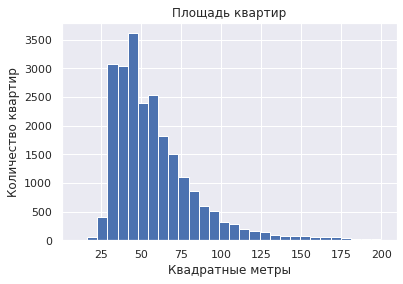

In [10]:
# построим гистограмму 'площадь'
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

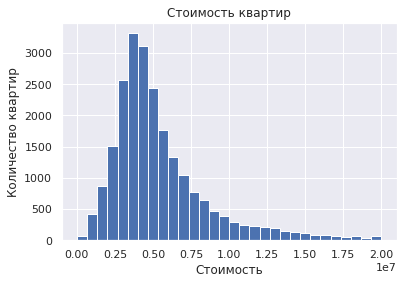

In [11]:
# построим гистограмму 'стоимость квартиры'
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

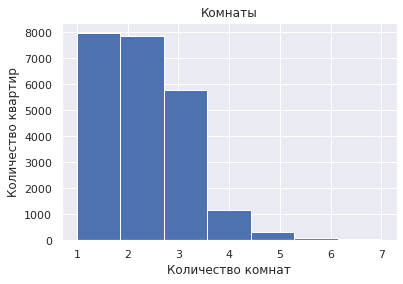

In [12]:
# построим гистограмму 'количество комнат'
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

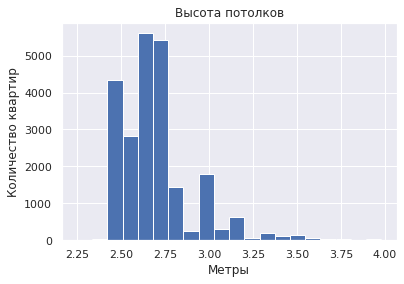

In [13]:
# построим гистограмму 'высота потолков'
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод**

Большинство квартир имеют площадь до 100 квадратных метров, есть несущественная часть квартир площадью более 200 квадратных метров. По площади есть как квартира 12 кв.м., так и 900 кв.м., среднее значение 60 квадратных метров.
Средняя стоимость квартир составляет 6,5 миллионов. Больше 20 миллионов вариантов немного и квартиры дороже выглядит странно.
Большинство квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты с количеством комнат больше 7, возможно, являются коммуналками или общежитиями. Количество квартир с нулевым числом комнат скорее всего являются студиями. 
Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит подозрительно. Есть значения в 27 метров скорее всего это ошибка данных и реальная высота 2,7 метра.

Время продажи (медиана): 96 

Время продажи (среднее): 181 



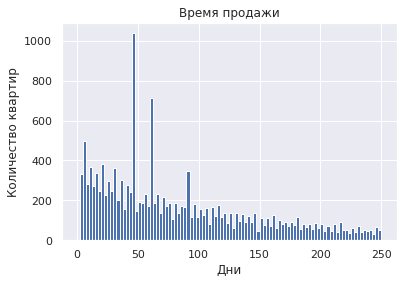

count   20,302.00
mean       181.12
std        220.05
min          1.00
25%         45.00
50%         96.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

In [14]:
# пропуски Nan в столбце 'days_exposition' заполним нулями и приведем в целочисленный тип
data['days_exposition'].fillna(0, inplace=True)
data['days_exposition'] = data['days_exposition'].astype('int64') 
# отбросим нулевые значения  
print('Время продажи (медиана):', round(data.query('days_exposition != 0')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 0')['days_exposition'].mean()),'\n')
# построим гистограму времени продажи
plt.hist(data.query('days_exposition != 0')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# изучем значения срока продажи
data.query('days_exposition != 0')['days_exposition'].describe()

<AxesSubplot:>

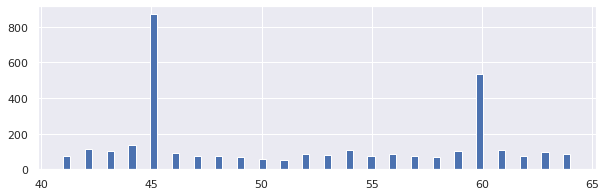

In [15]:
# посмотрим пики времени продажи
data.query('40<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3))

**Вывод**

Медианное время продажи - 95 дней. Среднее время продажи - 181 день. 
В основном квартиры продаются за срок от 50 до 100 дней. Чаще всего квартиры продаются в срок 45 дней и 60 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев. Быстрой продажей можно назвать срок в 49 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.


In [16]:
# используем межквартильный метод для анализа выбивающихся значений (метод iqr для удаления выбросов)
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# cтолбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

# анализируем, есть ли выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio
count,"23,461.00","21,422.00","22,230.00","23,268.00","21,754.00","23,376.00","22,581.00","23,461.00","22,179.00","23,461.00","17,990.00","18,013.00","23,461.00","8,005.00","23,461.00","9,026.00","21,459.00","23,461.00","23,461.00","23,461.00","23,461.00","23,461.00","23,461.00"
mean,9.86,"4,841,610.14",54.40,2.03,2.66,10.67,31.47,5.89,9.42,0.59,"28,811.98","14,209.79",0.47,491.20,0.59,517.91,104.06,"99,299.12",2.57,6.40,"2,017.37",55.89,18.08
std,5.68,"2,213,906.64",19.35,0.97,0.14,6.58,13.72,4.88,3.17,0.96,"12,639.75","8,610.99",0.75,341.97,0.88,277.82,112.17,"49,929.89",1.79,3.49,1.04,9.87,6.84
min,0.00,"12,190.00",13.00,0.00,2.25,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,0.00,111.00,0.00,1.00,"2,014.00",2.00,2.00
25%,6.00,"3,300,000.00",39.50,1.00,2.55,5.00,18.70,2.00,7.00,0.00,"18,576.50","9,257.00",0.00,288.00,0.00,293.00,18.00,"76,586.00",1.00,3.00,"2,017.00",50.00,13.00
50%,9.00,"4,400,000.00",50.20,2.00,2.64,9.00,30.00,4.00,9.00,0.00,"26,764.50","13,107.00",0.00,455.00,0.00,502.00,61.00,"94,965.00",3.00,6.00,"2,017.00",57.00,17.00
75%,14.00,"6,000,000.00",65.60,3.00,2.75,16.00,40.50,8.00,11.00,1.00,"37,310.00","16,298.00",1.00,612.00,1.00,730.00,154.00,"114,159.00",4.00,10.00,"2,018.00",62.00,22.00
max,50.00,"11,850,000.00",114.60,5.00,3.05,60.00,76.40,33.00,19.45,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00",464.00,"1,907,500.00",6.00,12.00,"2,019.00",90.00,72.00


**Вывод**

Значения в столбцах стоимость, общая площадь, площадь кухни и жилая, количество дней продажи, высота потолков и комнат стали реалистичные.
В датафрейме отброшены выбросы межквартильным методом. Выбросы “назначаются” данные, которые более чем в 1,5 межквартильных диапазонах (IQR) ниже первого квартиля или выше третьего квартиля.

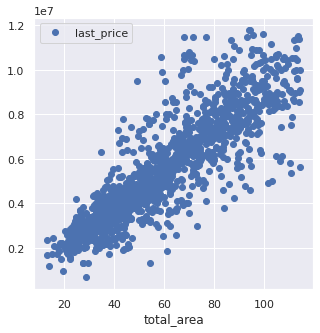

Корреляция цены и площади: 

            last_price  total_area
last_price        1.00        0.91
total_area        0.91        1.00 



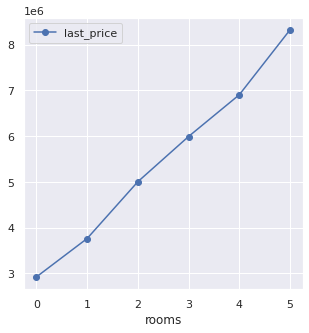

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00   0.55
rooms             0.55   1.00 



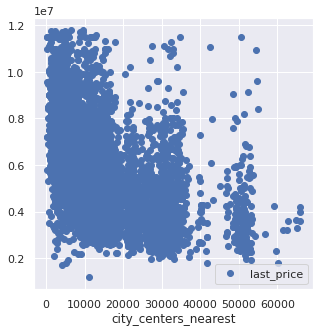

Корреляция цены и удалённости от центра: 

                      city_centers_nearest  last_price
city_centers_nearest                  1.00        0.70
last_price                            0.70        1.00 



In [17]:
# зависимость цены от площади
data.pivot_table(index='total_area', values='last_price') .plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# зависимость цены от числа комнат
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# зависимость цены от удалённости от центра
data.pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['city_centers_nearest', 'last_price']).corr(),'\n')

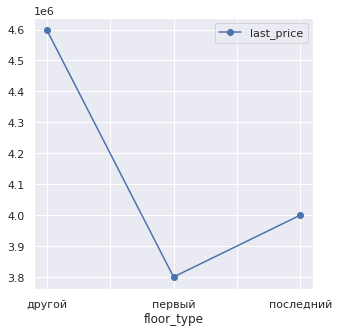

In [18]:
# зависимость цены от этажа
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

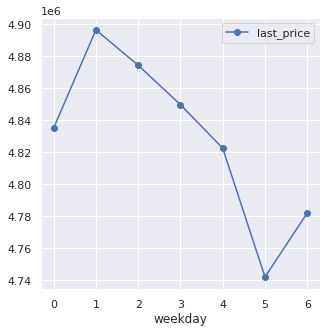

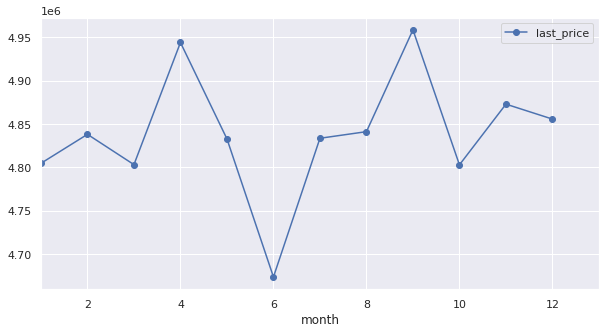

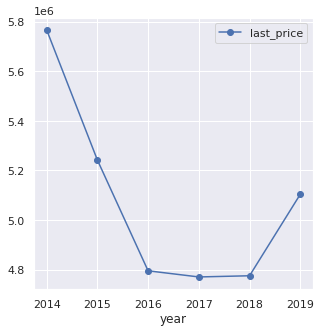

In [19]:
# зависимость от дня размещения
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
# зависимость от месяца размещения
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,13), figsize=(10, 5))
plt.show()
# зависимость от года размещения
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

**Вывод**

Изучив зависимость цены от площади, можно сделать вывод: чем больше площадь, тем выше стоимость квартиры. Корреляция этих параметров крайне высокая (0,91). Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже (0,54), чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко. Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты. Согласно графику, стоимость квартир на первом этаже ниже, чем стоимость квартир на последних и других этажах.  Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.
Дороже всего квартиры, опубликованные во вторник, дешевле всего - в субботу.
Квартиры, продающиеся с апреля, стоят дороже, дешевле всего - с июня.
Квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году ставки по ипотечным кредитам существенно стали снижаться, поэтому стоимость квартир снова стала повышаться.  

In [20]:
# cравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)

,sm_price
locality_name,
Санкт-Петербург,114633
Пушкин,103179
деревня Кудрово,92446
посёлок Парголово,90134
посёлок Мурино,85529
посёлок Шушары,78672
Колпино,75480
Гатчина,68624
Всеволожск,68582


**Вывод**

Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также небольшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

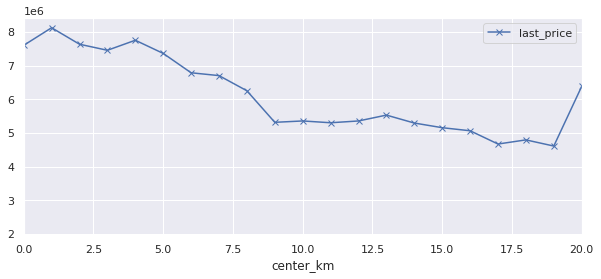

In [21]:
# добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['city_centers_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
# выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='x-', xlim=(0,20), figsize=(10,4))
)
plt.show()

**Вывод**

Центр ограничен радиусом в 5 км, далее медианная цена довольно заметно падает. 

Площадь (медиана): 52 

Площадь в центре (медиана): 70 

Площадь (среднее): 57 

Площадь в центре (среднее): 71 



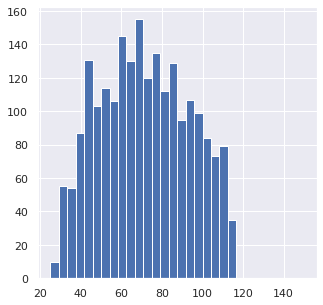

Число вариантов с ценой больше 20 млн: 0


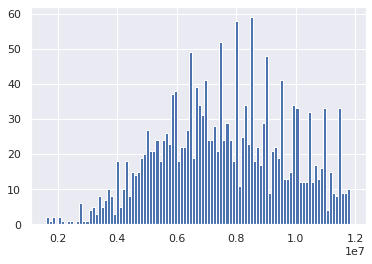

,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1.00,4899,31.97,395,14.58,8.00
2.00,5068,33.08,792,29.24,16.00
3.00,4101,26.77,880,32.48,21.00
4.00,965,6.30,433,15.98,45.00
5.00,289,1.89,209,7.72,72.00


Высота потолков (медиана): 2.65 

Высота потолков в центре (медиана): 2.8 

Высота потолков (среднее): 2.678865381880245 

Высота потолков в центре (среднее): 2.8069300739056278 



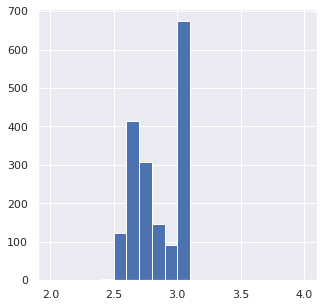

In [22]:
# выделяем сегмент квартир в центре,  беря за радиус 5 км
spb_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 5)')

# изучаем площадь
print('Площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,150), figsize=(5,5))
plt.show()

# изучаем стоимость квартир 
spb_center['last_price'].hist(bins=100)
print('Число вариантов с ценой больше 20 млн:', spb_center.query('last_price > 20000000')['last_price'].count())
plt.show()

# изучаем число комнат
spb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 5)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)

# изучаем высоту потолков
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean(),'\n')
spb_center['ceiling_height'].hist(bins=20, range=(2,4), figsize=(5,5))
plt.show()

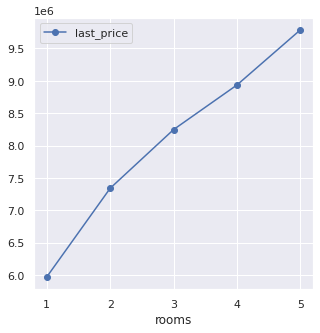

Корреляция цены квартиры и числа комнат: 

            last_price  rooms
last_price        1.00   0.28
rooms             0.28   1.00 



In [23]:
# анализируем зависимость стоимости квартиры от количества комнат
spb_center.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены квартиры и числа комнат:','\n')
print(spb_center.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

,mean,count,median
floor_type,,,
другой,"7,796,254.39",1251,"7,740,000.00"
первый,"6,446,757.80",269,"6,190,000.00"
последний,"7,756,307.03",319,"7,800,000.00"


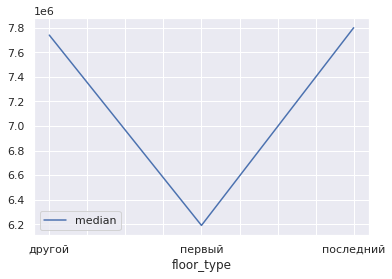

In [24]:
# анализируем зависимость стоимости квартиры от этажа
spb_center_floor_type = spb_center.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_center_floor_type.columns = ['mean', 'count', 'median']
spb_center_floor_type.plot(y = 'median')
spb_center_floor_type

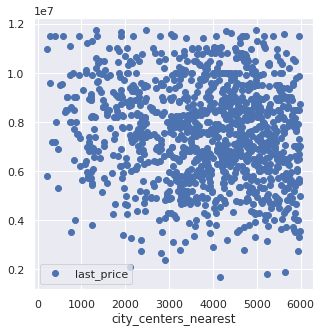

Корреляция цены и удалённости от центра: 

                      city_centers_nearest  last_price
city_centers_nearest                  1.00        0.24
last_price                            0.24        1.00 



In [25]:
# анализируем зависимость стоимости квартиры от удаленности от центра
spb_center.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(spb_center.pivot_table(index='floor', values=['city_centers_nearest', 'last_price']).corr(),'\n')

,mean,count,median
weekday,,,
6,"7,923,437.86",97,"8,000,000.00"
2,"7,615,203.25",302,"7,700,000.00"
1,"7,594,189.01",335,"7,545,600.00"
0,"7,545,879.76",274,"7,535,000.00"
4,"7,651,719.30",328,"7,500,000.00"
5,"7,473,003.50",135,"7,500,000.00"
3,"7,508,003.80",368,"7,450,000.00"


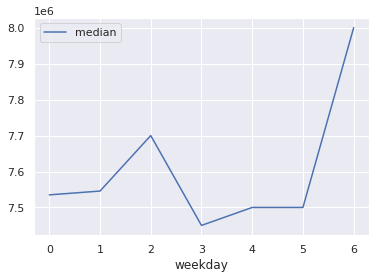

In [26]:
# анализируем зависимость стоимости квартиры от дня недели размещения объявления
spb_center_weekday_exposition = spb_center.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_center_weekday_exposition.columns = ['mean', 'count', 'median']
spb_center_weekday_exposition.plot(y = 'median')

spb_center_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
month,,,
9,"8,117,216.79",162,"8,050,000.00"
2,"7,803,710.55",200,"7,980,000.00"
3,"7,755,635.62",186,"7,800,000.00"
1,"7,686,490.10",104,"7,650,000.00"
7,"7,541,884.16",148,"7,650,000.00"
6,"7,357,811.76",160,"7,500,000.00"
11,"7,494,275.86",182,"7,424,000.00"
4,"7,440,802.55",175,"7,400,000.00"
8,"7,400,022.29",133,"7,297,000.00"


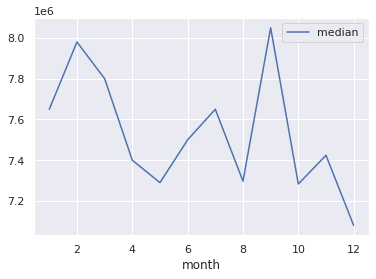

In [27]:
# анализируем зависимость стоимости квартиры от месяца размещения объявления
spb_center_month_exposition = spb_center.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_center_month_exposition.columns = ['mean', 'count', 'median']
spb_center_month_exposition.plot(y = 'median')

spb_center_month_exposition.sort_values('median', ascending = False)

,mean,count,median
year,,,
2015,"7,919,875.19",155,"7,950,000.00"
2019,"7,756,279.63",204,"7,900,000.00"
2016,"7,614,419.00",264,"7,698,500.00"
2018,"7,578,256.31",555,"7,600,000.00"
2014,"7,720,000.00",4,"7,495,000.00"
2017,"7,465,256.40",657,"7,300,000.00"


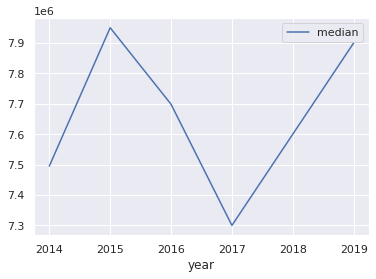

In [28]:
# анализируем зависимость стоимости квартиры от года размещения объявления
spb_center_year_exposition = spb_center.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_center_year_exposition.columns = ['mean', 'count', 'median']
spb_center_year_exposition.plot(y = 'median')

spb_center_year_exposition.sort_values('median', ascending = False)

**Вывод**

В ходе анализа квартир в центре города удалось выяснить следующие: 
 - площадь квартир в центре в среднем больше на 13-14 метров, а также в центре находится большое число квартир с огромной площадью (100 квадратных метров и более);
- в центре в два раза ниже доля однокомнатных квартир (15 %), чем в среднем по городу (32 %). Около половины четырёхкомнатных квартир находится в центре города (45 %), их доля в два раза выше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города (коммунальные квартиры);
- стоимость квартир в центре не превышает 20 млн руб;
- высота потолков в центре выше в среднем на 12 сантиметров;
- зависимость цены квартиры от числа комнат в центре города слабая, и не отличается от зависимости цены квартиры от числа комнат по городу;
- нет особых отличий от всей выборки квартир: квартиры на первом этаже в среднем дешевле, чем на других этажах;
- нет четкой зависимости от удаленности от центра города, уже сделана выборка по центру города;
- в центре выше стоимость квартир, опубликованных в воскресенье и сентябре;
- стоимость квартир в центре значительно выросла в 2015 году и снизилась только в 2017 году, в отличие от всей выборки, когда снижение стоимости квартир происходило в периоде с 2014-2018г. 

## Общий вывод

Входе анализа объявлений о продажи квартир в Санкт-Петербурге были обработаны пропущенные значения там, где это необходимо, заменены типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах.
При изучении время продажи квартир, выявлено, что чаще всего квартиры продаются за 95 дней. Если меньше 45 дней, то это быстрая продажа, если дольше 230 дней — это долго. На стоимость квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квартиры влияют день, месяц, год размещения. Выявлено, что на стоимость квартиры больше влияет площадь квартиры, нежели число комнат, т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные. 
Входе анализа выяснили, что квартиры на первом этаже значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
Дороже всего квадратный метр в Санкт-Петербурге, дешевле всего квадратный метр в Выборге. 
При анализе квартир в центре города выявлены следующие закономерности: центр города находится в радиусе 5 километров; последний этаж практически не влияет на стоимость квартиры, в отличие от остального города; есть очень дорогие однокомнатные квартиры; экономическая ситуация в стране мало влияла на элитную недвижимость в центре города. 


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [х]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  посчитано и добавлено в таблицу: цена квадратного метра
- [х]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [х]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [х]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [х]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [х]  построены гистограммы для каждого параметра
- [х]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [х]  в каждом этапе есть выводы
- [x]  есть общий вывод